In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
url_1 = 'https://raw.githubusercontent.com/Herjantoj/Case-Based-2/main/water-treatment.data'
df = pd.read_csv(url_1, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [ ]:
df.columns = ['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 
              'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S', 'DQO-S', 
              'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 
              'RD-SS-G', 'RD-SED-G']

In [ ]:
df.replace('?',np.NaN, inplace=True)

In [ ]:
df.isnull().sum()

Date         0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df.iloc[:,1:39] = imputer.fit_transform(df.iloc[:,1:39])

In [ ]:
df.isnull().sum()

Date        0
Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

In [ ]:
df = df.drop(['Date'], axis=1)
df = df.astype(float)

In [ ]:
df.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6521.467717,2.741657,0.246175,60.690777,119.674524,135.811306,12.284760,2.677945,394.898019,0.226925,...,387.537253,13.893820,12.753775,8.712181,8.462875,11.326846,6.782899,8.675122,8.158851,4.323828
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32964.000000,0.900000,7.600000,148.000000,326.500000,170.000000,55.850000,3.200000,1201.000000,7.700000,...,1235.000000,31.150000,50.600000,88.900000,81.800000,63.400000,87.800000,74.250000,87.700000,99.200000
50%,36215.000000,1.500000,7.800000,185.000000,400.000000,196.000000,64.000000,4.500000,1406.000000,7.800000,...,1433.000000,39.085806,59.300000,93.300000,85.000000,69.300000,89.900000,78.700000,90.700000,99.700000
75%,41094.000000,3.000000,8.000000,222.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1691.500000,47.650000,66.800000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [ ]:
#Scaling 
df = ((df - df.min()) / (df.max() - df.min())) * 9 + 1
df.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,5.888751,1.608730,5.550285,4.487539,4.410563,1.609950,7.040932,2.060237,3.888168,4.974858,...,3.236412,5.412385,6.274985,9.078958,8.829277,7.265789,9.071354,7.690864,8.945797,9.870701
std,1.173137,0.738770,1.230875,1.342057,1.252408,0.639949,1.539872,0.677009,1.378085,1.701936,...,1.067596,1.592922,1.264141,0.849508,0.880530,1.068570,0.788709,0.989558,0.824126,0.611862
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.121964,1.215569,4.500000,3.587224,3.569186,1.339267,6.346100,1.707865,2.919349,4.000000,...,2.520661,4.502548,5.490088,8.917660,8.657803,6.849057,8.930233,7.279468,8.818182,9.886792
50%,5.706782,1.377246,5.500000,4.405405,4.338372,1.461780,7.367688,2.036517,3.634742,4.750000,...,3.066116,5.412385,6.352423,9.346696,8.990751,7.405660,9.174419,7.787072,9.121212,9.957547
75%,6.584458,1.781437,6.500000,5.223587,5.118023,1.678534,8.069638,2.289326,4.563009,6.250000,...,3.778237,6.394268,7.095815,9.580715,9.271676,7.943396,9.453488,8.300380,9.353535,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,7.125382,1.377246,5.5,4.487539,4.411628,1.320419,7.655989,2.036517,6.091508,5.50,...,4.628099,5.412385,6.302863,9.561213,8.829277,7.471698,9.071354,7.866920,8.777778,9.943396
1,6.212089,1.781437,5.0,4.487539,4.788372,1.546597,8.019499,2.542135,8.010857,4.00,...,6.253444,5.412385,6.491189,9.492958,8.829277,8.490566,9.071354,7.878327,9.262626,10.000000
2,4.989746,2.320359,4.5,4.487539,5.677907,1.414660,8.107242,1.758427,4.542071,4.00,...,4.319559,5.412385,6.243392,9.570964,8.829277,5.858491,9.071354,7.456274,8.919192,9.787736
3,5.492355,1.916168,6.0,4.847666,6.305814,1.442932,7.568245,2.036517,7.208220,4.75,...,4.187328,4.726115,6.838106,9.541712,9.230058,7.688679,9.209302,8.197719,9.010101,10.000000
4,5.834323,1.377246,6.5,5.665848,5.343023,1.367539,7.467967,1.910112,6.091508,5.50,...,4.958678,5.412385,6.689427,9.570964,8.829277,7.566038,9.430233,7.730038,8.797980,9.929245


In [ ]:
#Initialize random centroids
def random_centroids(data,k):
  centroids = []
  for i in range(k):
    centroid = df.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(df,5)
centroids

,0,1,2,3,4
Q-E,5.114409,6.564490,5.360496,4.803022,5.619356
ZN-E,1.296407,2.158683,1.188623,2.589820,1.916168
PH-E,7.000000,3.000000,5.500000,3.000000,4.000000
DBO-E,4.487539,5.245700,5.621622,4.272727,6.085995
DQO-E,6.075581,2.998837,4.338372,5.594186,2.119767
SS-E,1.640838,1.056545,1.490052,1.584293,1.640838
SSV-E,9.661560,7.116992,8.320334,9.661560,8.683844
SED-E,1.910112,2.542135,2.289326,2.289326,2.415730
COND-E,3.941838,3.819698,5.212098,4.196588,3.411400
PH-P,3.250000,1.750000,3.250000,4.750000,3.250000


In [ ]:
#Label each data point
def get_labels(data, centroids):
  distances = centroids.apply(lambda x:np.sqrt(((data - x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)


In [ ]:
labels = get_labels(df, centroids)
labels

0      2
1      2
2      0
3      2
4      2
      ..
522    1
523    4
524    1
525    1
526    1
Length: 527, dtype: int64

In [ ]:
labels.value_counts()

0    147
1    139
4    127
2    101
3     13
dtype: int64

In [ ]:
#Update Centroids
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
#Scatter Plot
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  # clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

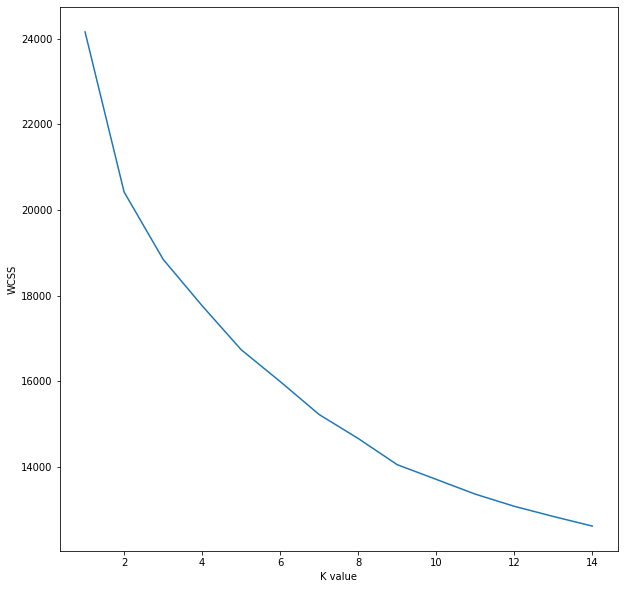

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
wcss1 = []

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss1.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss1)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

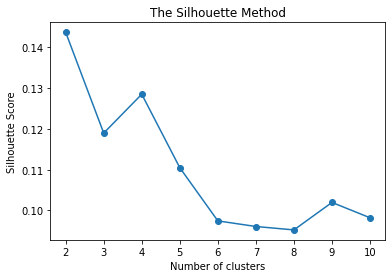

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    silhouette.append(silhouette_score(df, kmeans.labels_))
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

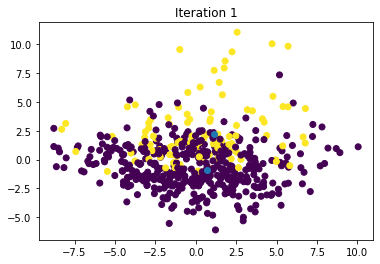

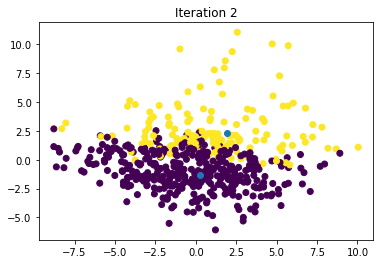

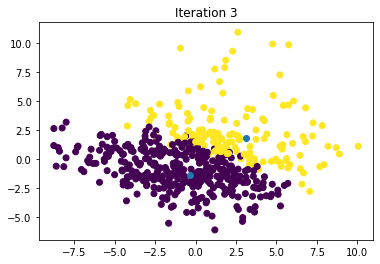

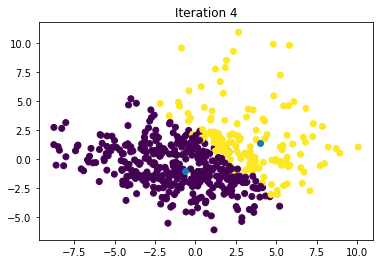

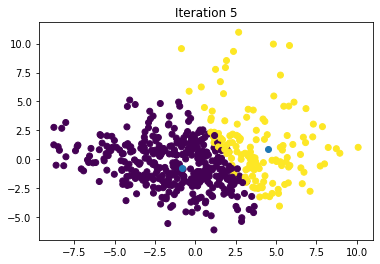

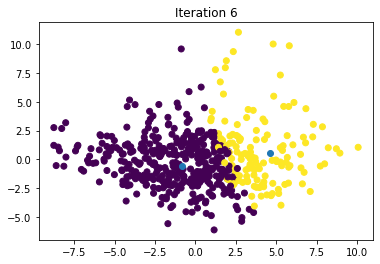

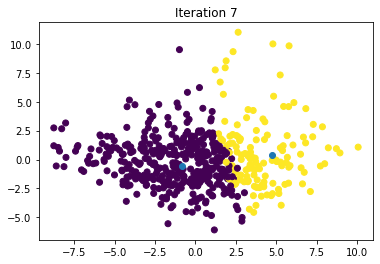

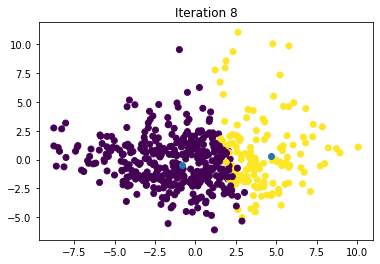

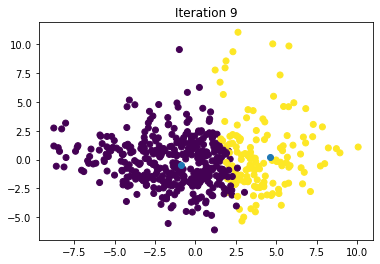

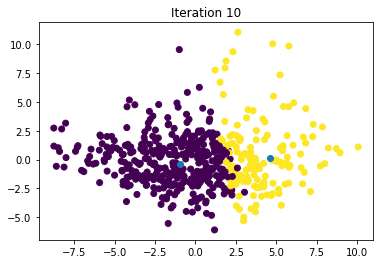

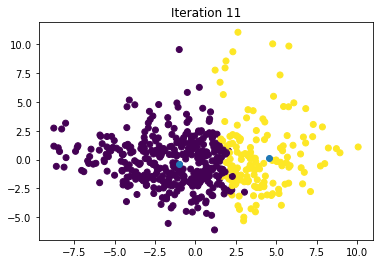

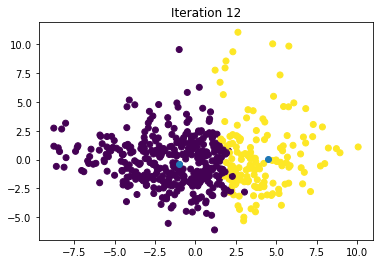

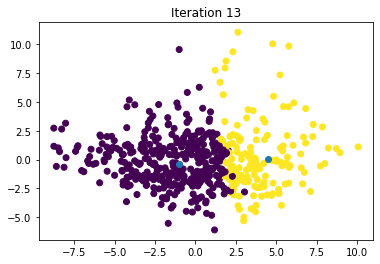

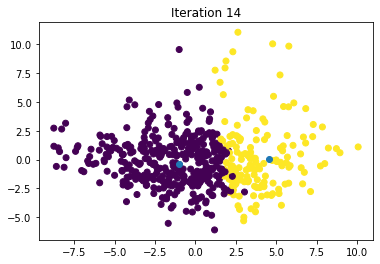

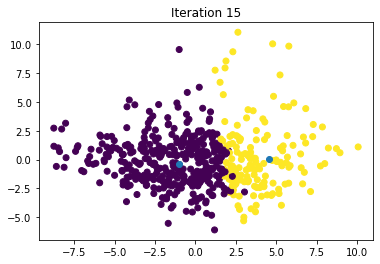

In [ ]:
max_iterations = 100
k = 2

centroids = random_centroids(df, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(df, centroids)
  centroids = new_centroids(df, labels, k)
  plot_clusters(df, labels, centroids, iteration)
  df['clusters'] = labels
  iteration += 1

In [ ]:
df['clusters'].value_counts()

0    375
1    152
Name: clusters, dtype: int64